# Lesson 1: Requirements and Data Identification

[Next Lesson](02-Clean-Merge.ipynb)

## Contents

* [Lesson 1: Requirements and Data Identification](#Lesson-1:-Requirements-and-Data-Identification)
	* [Contents](#Contents)
	* [Getting Started](#Getting-Started)
	* [Requirements](#Requirements)
		* [Determine Business Objectives](#Determine-Business-Objectives)
		* [Assess the Situation](#Assess-the-Situation)
		* [Determine Goals](#Determine-Goals)
		* [Create a Plan](#Create-a-Plan)
	* [Data Identification](#Data-Identification)
		* [Introduction to pandas](#Introduction-to-pandas)
		* [Access Data](#Access-Data)
			* [Loading Data from Files](#Loading-Data-from-Files)
			* [Loading Data from a Database](#Loading-Data-from-a-Database)
			* [Loading Data from an API](#Loading-Data-from-an-API)
			* [Scraping Data](#Scraping-Data)
		* [Describe Data](#Describe-Data)
	* [Next Steps](#Next-Steps)
	* [Resources](#Resources)

## Getting Started

This notebook makes use of several third-party libraries including [pandas](https://pandas.pydata.org/), [lxml](http://lxml.de/), and [requests](http://docs.python-requests.org/en/master/). Additionally, pandas makes use of [xlrd](https://pypi.python.org/pypi/xlrd) to load data from Excel files.

We can use the the [pip](https://pip.pypa.io/en/stable/) tool to install these libraries. Typically this tool is executed from the command line but we can call it from within the notebook using `!pip`.

To execute a cell, click in it and press `SHIFT` and `ENTER` on the keyboard, click the "run cell" button, or select "Run" and "Run Cells" from the menus above.

In [ ]:
!pip install pandas lxml requests xlrd

## Requirements

The [Cross-industry standard process for data mining](https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining), or CRISP-DM, is a model for the data mining process.  With data mining and data analytics being very interrelated, much of the CRISP-DM model can be applied to analytics.  CRISP-DM breaks the data mining process into phases with the first phase focusing on business understanding and proper planning based on that understanding.  We can separate the business understanding phase into four parts: determining business objectives, assessing the situation, determining goals, and creating a plan.

### Determine Business Objectives

As a first step, it is important to understand, as throughly as possible, what the customer wants to accomplish.  While there is often a primary goal the customer would like to achieve, there are often related goals that could be addressed. Identifying related goals early in the process could save time later.  

When determining objectives, it is also important to note what constrains exists such as limitations on access to data or potential data quality issues.

For example, marketing might want to examine previous efforts and results in an attempt to determine which strategies were effective or characterize the most likely customers.  In this case, past marketing campaign data and data about potential customers would need to be available.

If the goal were to minimize distribution costs, it would be important to be aware of the factors that influence those costs.  If the company relies on a third party for product transportation, we would likely need to collect competitor pricing data.

### Assess the Situation

In order to quickly establish the customer's objectives in the previous step, only a rough idea available resources and constraining factors was necessary.  Before analytics goals can be formulated and a plan created, it is important to develop a more detailed understanding of the availability of resources, the existence of constraints, and any assumptions that must be made. 

When considering resources it is important to not only list those that are available but also when they will be available.  Naturally, relevant data is a critical resource and it will be important to note any access restrictions that might exist. It is also important to consider personnel, hardware, and software when assessing resource availability.  

If it is determined that there is a lack of resources, whether a shortage of personnel or insufficient data, a plan should be developed to resolve this.  Can required data be collected? If so, how long will it take before the needed data is available?

Knowing constraints and assumptions as early in the process as possible, allows the analytics team to address and prepare for them rather than spend time reacting later.  In addition to resource constraints due to time or cost, it's important to determine any legal or security-related constraints. Once limitations and constraints are known, a list of risks that could delay the project can be compiled.  Methods to mitigate risk and contingency plans should also be developed.

As part of this cataloging process, a glossary of terminology should also be created.  This glossary should include both business- and analytics-specific terminology.  Such a glossary can facilitate communication and ensure that both the customer and analytics team understand each other.

### Determine Goals

While the customer's existing goals drove the discussion and process in the previous steps, it's important to developed related, analytics-specific goals.  Just as the business goals will use business terminology, the analytics goals should make use of analytics terminology.  It's import that these goals be as specific and well-defined as possible.  With each goal, success criteria and identification of who is responsible for evaluating success should be established.

### Create a Plan

Once goals and success criteria are established, the steps necessary to achieve the goals should be developed.  For each stage of the analytics process, inputs, resources, outputs, and duration should be determined; specific tools and techniques should also be identified. As part of the planning process, dependencies and scheduling issues should be analyzed to minimize risk.  

The project plan is dynamic. At the end of each stage, a review of the remaining phases of the plan should be conducted and updates made accordingly.

## Data Identification

Once a plan has been developed and data is made available, it is important to develop an initial understanding of the data, identifying what it contains, and determining whether what is available is sufficient to complete the analytics objectives or not. 

To access and interrogate data, we'll make use of functionality included in the standard library, the set of tools included with python, as well as third-party libraries. One such library is [pandas](https://pandas.pydata.org/), which can be used to load data in a variety of formats from a variety of sources. The pandas library includes data structures and tools developed to aid in data analysis.

### Introduction to pandas 

Before loading data with pandas, let's explore two of the common data structures pandas provides: the [Series](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) and the [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).  A Series is used to store one-dimensional data while a DataFrame can be used for two-dimensional, or tabular, data. 

To begin, we import the pandas module and follow convention of naming it *pd*.

In [ ]:
import pandas as pd

With pandas imported, we can create a Series.  While there are a variety of ways to do this, we'll use a list here.

In [ ]:
data = pd.Series([1, 2, 3, 4, 5])

To view to the contents of the Series, we can use the *print()* or *display()* functions. When using a notebook, we can also display its contents by referencing the Series on the last line of a cell. Here we see that in addition to the values in the original list, an index associated with each element is also displayed.  The data type of the elements is displayed as we well.

In [ ]:
display(data)

To access the values stored in the Series themselves, we can use the *values* attribute.  Here, the values are stored using a [NumPy](http://www.numpy.org/) array.  NumPy is a scientific computing package and it useful for working with numerical or high-volume data; pandas relies heavily on NumPy. NumPy arrays have methods that allow us to transform an array to a traditional Python data structure such as a list; a pandas Series exposes this functionality as well.

In [ ]:
# access a Series values
data.values

In [ ]:
# covert the array of values to a list
data.values.tolist()

In [ ]:
# convert the Series to a list using the underlying array's tolist() method
data.tolist()

Notice that we didn't have to use the *print()* or *display()* functions to display content. If the last statement of a cell is an object by itself or an operation that doesn't assign the value to a variable, Jupyter notebook will display the string representation of that object or result as though the *display()* function were used.  For example, because `data.values` was the last statement of the cell, the content of `data.values` was displayed.

As noted earlier, values in a Series are also associated with an index.  We can manually specify an index or allow pandas to generate one as was done for our series.  To access the index, we can use the Series *index* attribute.

In [ ]:
# Series 
data.index

The automatically-generated index is represented by the *RangeIndex* class that describes the index. This is a more memory-efficient way of storing the index data than creating an array containing each value.  If necessary, we can generate the corresponding array using the *values* attribute.

In [ ]:
# Index values
data.index.values

To access elements within a series, we can use the same bracket notation used with other data structures in Python such lists.  For example, to access the second element, we can execute `data[1]`.  As with most other data structures in Python, Series are zero-indexed and begin numbering at zero.  

In [ ]:
# access the second element
data[1]

List lists, Series also support slicing.

In [ ]:
# slice of elements starting at index 1 and up to but not including index 4.
data[1:4]

When creating a Series, we can specify the index using the *index* keyword argument.  As shown in the example below, an index does not need to be numeric.

In [ ]:
# series with index specified
data = pd.Series([60, 65, 68, 63, 61], index=["Mon", "Tue", "Wed", "Thu", "Fri"])
data

When working with a non-numeric index, we can still access elements in a series using bracket or slice notation.  Note that slices include the last element in the slice when working with non-numeric indexes.

In [ ]:
# access an element using an index label
data["Mon"]

In [ ]:
# slicing
data["Mon":"Thu"]

The pandas library supports working with data from a variety of sources and data structures.  In previous examples, we created Series objects using lists.  Below is an example in which a Series is created from dictionary. Note that prior to Python 3.7, the order of dictionary keys is not guaranteed; this affects the order in which values appear in the Series. 

In [ ]:
# dictionary of temperatures
temperatures = {"Mon": 60, "Tue": 65, "Wed": 68, "Thu": 63, "Fri": 61}
temperatures

In [ ]:
# Series from a dictionary
data = pd.Series(temperatures)
data

In [ ]:
# slicing
data["Mon":"Thu"]

The pandas library provides the DataFrame data structure for use with two dimensional data.  One can think of the DataFrame as an extension of a Series in the sense that a DataFrame consists of multiple Series.  For example, suppose we have two Series representing high and low daily temperatures.

In [ ]:
# two Series
low_temps = pd.Series({"Mon": 52, "Tue": 49, "Wed": 55, "Thu": 53, "Fri": 51})
high_temps = pd.Series({"Mon": 60, "Tue": 65, "Wed": 68, "Thu": 63, "Fri": 61})
display(low_temps, high_temps)

When creating a DataFrame, we can specify a dictionary where keys represent column names and the corresponding values are the Series containing data.  Below, the `forecast` DataFrame is created with the two Series created earlier.

In [ ]:
# create a dataframe from two series
forecast = pd.DataFrame({"high": high_temps, "low": low_temps})
forecast 

Notice that pandas automatically aligns Series' data based on index value.  The combined indexes of the Series serve as the index for the DataFrame.  We can specify the order of the index when we create the DataFrame.

In [ ]:
# specify index
forecast = pd.DataFrame({"high": high_temps, "low": low_temps}, index=["Mon", "Tue", "Wed", "Thu", "Fri"])
forecast

Just as we could with Series, we can access the index of a DataFrame using the *index* attribute.

In [ ]:
# display index
forecast.index

A DataFrame's index serves to identify values in one dimension.  For one-dimensional Series objects, a value for the index is sufficient to identify a specific value. Because DataFrames represent two-dimension data, an index is not enough to identify a specific value. In a DataFrame, column labels are used to identify the second dimension.  To view a DataFrame's columns, we can use the *column* attribute.

In [ ]:
# display columns
forecast.columns

To access values associated with a column, we can use bracket notation with the column name.

In [ ]:
# access a column using bracket notation
forecast['high']

A DataFrame also has attributes corresponding to its columns allowing us to access column data using the dot operator.

In [ ]:
# accessing a column using an attribute
forecast.high

Each DataFrame column is a Series, we can verify this using the *type()* or *isinstance()* function.

In [ ]:
# columns are Series
type(forecast.high)

In [ ]:
# columns are Series
isinstance(forecast.high, pd.Series)

As with Series, we can access data stored in a DataFrame using the *values* attribute.

In [ ]:
# underlying values
forecast.values

Because the DataFrame represents two-dimensional data, its values are stored as a NumPy array of nested NumPy arrays where each inner array corresponds to a row. Like most objects that represent a collection, arrays support bracket notation. 

In [ ]:
# first row
forecast.values[0]

In [ ]:
# first row, second value
forecast.values[0][1]

While this method of accessing data based on the DataFrames underlying array works, it is cumbersome. We can instead use the DataFrame's index and columns.  As we saw earlier, we can use a column's name to access its values.

In [ ]:
# access column by name
forecast['low']

To access a row, we rely on the index corresponding to the row and the DataFrame's *loc* attribute.

In [ ]:
# access a row by index label
forecast.loc['Wed']

The `forecast` DataFrame has string index values but we can still use integers to specify a specific row through the use of the *iloc* attribute.

In [ ]:
# access a row by position
forecast.iloc[2]

We can combine these methods of accessing specific rows and columns to access a specific value within the DataFrame. 

In [ ]:
# access a value by row name and index
forecast.loc['Wed']['low']

In [ ]:
# access a value by row name and index
forecast['low'].loc['Wed']

Alternatively, we can specify both the index and column name simultaneously when using *iloc* or *loc*.

In [ ]:
# access a value by row name and index
forecast.loc['Wed', 'low']

Using column names and index values/labels to access data gives more context to what the corresponding data represents than using the DataFrame's underlying array.

We can also use slicing with a DataFrame's index or columns. To specify a column slice, we must use the *loc* or *iloc* properties.

In [ ]:
# row slicing
forecast.loc['Mon':'Wed']

In [ ]:
# column slicing
forecast.loc[:, 'high':'low']

We can also use bracket notation to apply a mask to a DataFrame.  For example, if we want to view rows in which the high temperature is 65 or greater we can create the following mask. 

In [ ]:
# create a mask
mask = forecast.high >= 65
mask

Applying the mask to the DataFrame effectively filters the data.

In [ ]:
# apply a mask
forecast[mask]

Another advantage to using DataFrames is the ease with which we can manipulate the data.  For example, the following line calculates the mean temperature value for each row and stores the value in a new column.  Had we used another data structure, we might have had to write a for-loop to do this calculation.

In [ ]:
# calculate new column's values
forecast['mean'] = (forecast['high'] + forecast['low']) / 2
forecast

In fact, for performance reasons, we should try to avoid the use of for-loops when manipulating data stored in a DataFrame.  A for loop will certainly work if needed though.

In [ ]:
# display index and row data for each row
for index, row in forecast.iterrows():
    print("Index:", index)
    print("Row:", row)

In [ ]:
# calculate difference using a for loop
forecast['difference'] = 0  # create new column with all zeros
for index, row in forecast.iterrows():
    row['difference'] = row['high'] - row['low']
    forecast.loc[index] = row  # iterrows creates a copy, we need to explicitly update the dataframe

forecast

As we continue working with pandas, additional features will explored. For a more in-depth introduction to pandas, see the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/).

### Access Data

Accessing data will depend on how it is stored. If the relevant data is stored as a spreadsheet, one will need access to the spreadsheet file and the necessary tools to read the file.  Similarly, the appropriate tools are required to access data stored in a database.

#### Loading Data from Files

Files tend to be a commonly used container for data, creating the files is relatively easy with spreadsheet software and sharing the data can be as easy as attaching a file to an email.  Accessing data from a file in Python is also relatively easy. The file we'll use for these examples is from [Kaggle](https://www.kaggle.com/), which hosts both datasets and notebooks. Specifically, we'll use an [HR dataset](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) created by IBM that includes HR data about employees.  

We can use Python's standard library, the collection of data structures and tools included with Python, to load the data contained in `data/01-attrition.csv`.  

As a first step, let's examine the source CSV.  When working with text data like a CSV, it's helpful to know how fields are separated, using a delimiter, relying on a fixed width for each column, or by some other means.

In the code below, we start by opening the source CSV for reading and assign it to the variable `infile`.  To read only the first five lines of the CSV, we'll use a while-loop that continues as long as the `line_number` variable has a value less than 5. Before entering the loop, we'll initialize the variable with a value of 0.  Each iteration through the loop, we'll read a line from the file, print the line, and increment the `line_number` variable.

In [5]:
with open("./data/01-attrition.csv") as infile:
    line_number = 0
    while line_number < 5:
        print(infile.readline())
        line_number += 1
        

﻿Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager

41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5

49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7

37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0

33,No,Travel_Frequently,1392

Based on the output, it appears that the data is comma-separated as we would expect in a CSV (comma-separated values) file. We can also see that the first line contains header data.

The Python standard library includes a [CSV module](https://docs.python.org/3/library/csv.html) for working with CSV data. Among the tools in this module is the [*Sniffer*](https://docs.python.org/3/library/csv.html#csv.Sniffer) class that can be used to determine formating information for a CSV. The code below reads the first ten kilobytes of the file to determine formatting information; the value can be increased as needed.

In [9]:
import csv
with open("./data/01-attrition.csv") as infile:
    dialect = csv.Sniffer().sniff(infile.read(10000))

print(f"Delimter: {dialect.delimiter}")

Delimter: ,


This is consistent with what we saw from the first five lines of the data.  

Typically, we load the contents of a file one line at a time.  To store all the file's lines, we'll create an empty list and store it in the variable named `csv_data`.  Next, we can open the file and specify its [encoding](https://en.wikipedia.org/wiki/Character_encoding) as `UTF-8-sig`, which indicates that the file contains [UTF-8]((https://en.wikipedia.org/wiki/UTF-8) encoded data with an optional [byte order mark](https://en.wikipedia.org/wiki/Byte_order_mark).  The variable used to refer to the file object is named `csv_file`. Using `with` will keep the file open only for as long as we need it and allows us to avoid having to write code to explicitly close the file.  

We can use the csv module's *reader()* function to iterate through the file line by line. The *reader()* function takes an optional *dialect* parameter that will allow us to specify dialect information extracted by a *Sniffer* if its available. Each line is represented by a list with elements corresponding to the different field values in the line. As we read through the file, we will append each line to the first list we created, `csv_data`.  After reading the contents of the file, we can then display the first few lines. 

In [10]:
# load data from CSV file
import csv

csv_data = []
# open the file for reading
with open('./data/01-attrition.csv', encoding='utf-8-sig') as csv_file:
    # create a csv reader using the exsiting dialect information
    reader = csv.reader(csv_file, dialect=dialect)
    # iterate through the csv's rows and append to the csv_data list
    for row in reader:
        csv_data.append(row)
        
# print the first five rows
for row in csv_data[:5]:
    print(row)
    

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
['41', 'Yes', 'Travel_Rarely', '1102', 'Sales', '1', '2', 'Life Sciences', '1', '1', '2', 'Female', '94', '3', '2', 'Sales Executive', '4', 'Single', '5993', '19479', '8', 'Y', 'Yes', '11', '3', '1', '80', '0', '8', '0', '1', '6', '4', '0', '5']
['49', 'No', 'Travel_Frequently', '279', 'Research & Development', '8', '1', 'Life Sciences', '1', '2', '3', 'Male', '61', '2', '2', 'R

Examining the output, we see that the first five elements of the `csv_data` list are themselves lists; each of these lists corresponds to a line from the original file. Each of these lists, in turn, have elements that correspond to individual values. 

There are a variety of ways we can structure this data for convenient access.  One way is to create a list of dictionaries where each dictionary corresponds to a row of data with field names as dictionary keys and row data as dictionary values. To construct this list of dictionaries, we'll iterate through `csv_data`.  As a first step, lets assign the first row to a new variable named `keys`.

In [ ]:
fields = csv_data[0]
fields

Next, we'll create a list to store the dictionaries representing each row; we'll assign this list to the `hr_data` variable.  We next iterate through the remaining rows of `csv_data` and create a dictionary for each row.  Recall that each row is itself stored as a list with elements using the `enumerate()` function.  The `enumerate()` function will return both the index of an element in a list as well as the element.  Having the index will allow us to us to access the corresponding field name from the `fields` list.  In the newly created dictionary, we'll pair the field names and field values.  Once we've finished iterating through the row, we'll store the dictionary in the `hr_data` list.

In [ ]:
hr_data = []

# iterate through the remaining data rows
for row in csv_data[1:]:
    row_dictionary = {}
    
    # iterate through the row elements using 
    for index, element in enumerate(row):
        # get the corresponding field name
        field_name = fields[index]
        # store the element with its field
        row_dictionary[field_name] = element
        
    #add the dictionary to the list
    hr_data.append(row_dictionary)
    
# diplay the data from the second row of data
hr_data[1]

This structure will allow us to easily access data for each record.  For example, we can print the ages of the first ten records using the following code.

In [ ]:
for record in hr_data[:10]:
    print(record['Age'])

While this is an improvement over the list-of-lists structure we initially created when loading the CSV data, there are still issues with the way we've stored the data. One issue is that all the data is stored as strings.  While this is fine for some fields such as `Business Travel` or `Department`, it would be preferable to store other fields like `Age` as numeric values.  To demonstrate this problem, let's try to calculate the mean age of the first ten records. This code will result in an error.

In [ ]:
total_age = 0

# iterate through the first 10 records and add each age to the total 
for record in hr_data[:10]:
    total_age += record['Age']
    

total_age/10

Our code caused an error because we tried to add an integer, 0, and a string, the value associated with `Age`.  To fix this we would have had to convert the value when we loaded the data or when we tried to do a calculation with it as demonstrated below.

In [ ]:
total_age = 0

# iterate through the first 10 records and add each age to the total 
for record in hr_data[:10]:
    # convert age value to an integer then add to total_age
    total_age += int(record['Age'])
    

total_age/10

We could continue to refine the code we wrote to load the data to include necessary data type conversions.  However, third party libraries exist that try to do this automatically.  One such library is pandas.  With pandas loaded, we can use its `read_csv()` function to load data from a file; we can specify the location of the file as an argument to the function.  The `read_csv` method returns a DataFrame object which we can store in a variable.  To display the first few rows of a DataFrame, we can use the `head()` method.

In [ ]:
# load data
hr_data = pd.read_csv('data/01-attrition.csv')

# display first 5 rows of data
hr_data.head(5)


Notice that the output is much easier to view and understand than what was displayed when we loaded the contents of the file as a list of lists; this is one of the advantages to using pandas to work with data. This is also do to how pandas integrates with the notebook software, Jupyter. 

By default, pandas will only display twenty columns.  If there are more than twenty columns, as in this example, pandas will indicate this with ellipses.  To increase the number of columns, we can use the `set_option()` function, specifying the option we want to change as the first argument and its new value as the second. The code below increases the number of displayed columns to fifty then displays the first five rows again.

In [ ]:
# increase number of displayed columns
pd.set_option('display.max_column', 50)

# display first 5 rows of data
hr_data.head(5)

When loading data, pandas will automatically assign an index to each row. The index appears before the first named column above.  To access a row we can use the `iloc` attribute to access a row by specifying its position in the DataFrame or the `loc` attribute by specifying the label associated with the row in the DataFrame's index; when the index is automatically assigned these two properties can be used interchangeably.  

In [ ]:
# get the third row
hr_data.iloc[2]

In [ ]:
# get the row with index label "2"
hr_data.loc[2]

Now that we have the data loaded into a DataFrame, we can do a variety of things including calculating summary statistics or creating visualizations. For example, we can calculate the mean age of the first ten records using the following code.

In [ ]:
# mean age of 
hr_data.iloc[:10]['Age'].mean()

To calculate the average age, we didn't have to restructure the data or explicitly change the data type.  This is one of the advantages of using a library like pandas.  

To explain the line of code above, let's look at each part.  The `hr_data` variable refers to the DataFrame we created using the CSV data.  We can specify multiple rows by using Python's slice notation with `iloc`.  To specify a particualr column, we can use bracket notation along with the columns name. When we access a subset of the rows, the data structure is still a DataFrame.  When we access a specific column, the data structure used is a related one-dimensional structure known as a [Series](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html).  Both DataFrames and Series have methods that can be used to manipulate the data stored within them.

In [ ]:
# first ten rows, a DataFrame
hr_data.iloc[:10]

In [ ]:
# Age column of first ten rows, a Series
hr_data.iloc[:10]['Age']

In [ ]:
# mean of the age of the first ten rows
hr_data.iloc[:10]['Age'].mean()

Because slicing is such a common operation, pandas supports specifying slices of rows using bracket notation on a DataFrame directly without having to use the `iloc` attribute.

In [ ]:
hr_data[:10]['Age'].mean()

We can also access columns within a DataFrame  with the dot operator.

In [ ]:
hr_data[:10].Age.mean()

We'll explore more of the features of a DataFrame later but let's continue looking at how we can load data from different sources.

#### Loading Data from a Database

It is often convenient to store data in a database rather than in individual files.  There are a [variety of Python libraries available](https://wiki.python.org/moin/DatabaseInterfaces) to interact with databases.  One of the most common is [SQLAlchemy](http://docs.sqlalchemy.org/en/latest/dialects/index.html) and pandas includes functionality to work with it.  Before we can use SQLAlchemy, we should make sure it is installed using `pip`.  Typically, we will install the libraries we expect to use before starting work in a notebook but for completeness, this step is included in this notebook.

In [ ]:
!pip install sqlalchemy

For convenience, we'll use a SQLite database for this example. SQLite databases are convenient because they can be stored as a single file.  The process we'll use to connect to and load data from the SQLite database can be used with other database engines such as Microsoft SQL Server or MySQL.

In this example, we'll load data from a commonly used example database, the [Chinook database](https://chinookdatabase.codeplex.com/), which contains data for a fictitious media store.  An diagram of the database structure appears below.

<figure>
  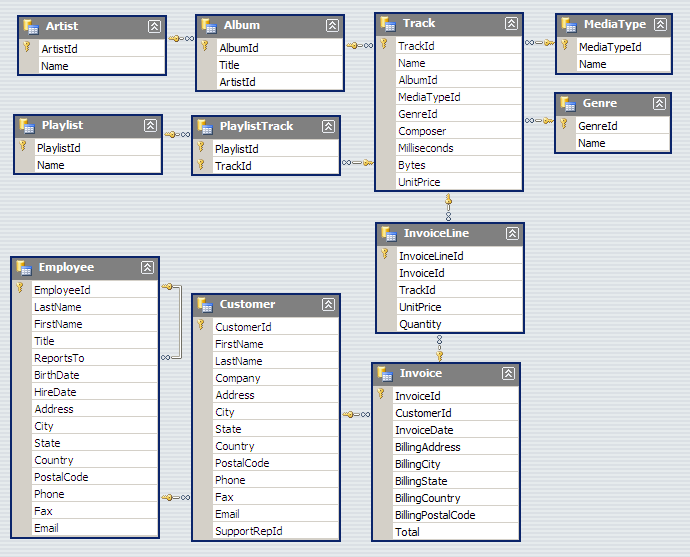	
  <figcaption style="text-align: center; font-weight: bold">Diagram of the Chinook Database</figcaption>
</figure>

In order to load data from a database using pandas, we must first create a connection to the database.  This is done using SQLAlchemy's `create_engine()` function.  Using a resource identifier, we can specify the location to the SQLite database file as an argument when we call the function; see the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/io.html#engine-connection-examples) and [SQLAlchemy documentation](http://docs.sqlalchemy.org/en/latest/core/engines.html) for examples of how to connect to other database engines.

In [ ]:
# import the create_engine function
from sqlalchemy import create_engine

# create a database connection
engine = create_engine('sqlite:///data/01-chinook.sqlite')

We can use SQLAlchemy alone to load data from the database.  One we've defined an engine, we can use its `connect` method to establish a connection to the database and query the database with the connection.  To demonstrate how we can query the database, we'll query the database for the first five records from the inner join on the `Invoice` and `Customer` tables ordered by `InvoiceID`. First we'll store the query as a string for clarity, then query the database, and finally iterate through the result to display each record.

In [ ]:
# database query
query = """
SELECT * 
FROM Invoice INNER JOIN Customer 
ON Invoice.CustomerId = Customer.CustomerId 
ORDER BY Invoice.InvoiceID 
LIMIT 5
"""

# open database connection, close when finished
with engine.connect() as connection:
    # execute query
    result = connection.execute(query)
    # iterate through results
    for row in result:
        print(row)

We can see that each record is represented by a tuple with elements corresponding to field values; this is similar to the structure of the data we initially had when working with the CSV file.  We could write code to make it easier to work with this data or we could rely instead on a library like pandas.  

With a connection to the database, we can query the database for data and store the result in a DataFrame using pandas' `read_sql_query()` function.  For this example, we'll load the entire result of the join.

In [ ]:
# query
query = """
SELECT * 
FROM Invoice INNER JOIN Customer 
ON Invoice.CustomerId = Customer.CustomerId 
ORDER BY Invoice.InvoiceID 
"""
# query database
invoice_customer = pd.read_sql_query(query, engine)

# display first five rows
invoice_customer.head(5)


#### Loading Data from an API

Many websites that provide access to data often provide a means of accessing that data programmatically using an [application programming interface](https://www.programmableweb.com/api-university/what-are-apis-and-how-do-they-work) or API. A common way to access an API is by making [HTTP](https://en.wikipedia.org/wiki/Hypertext_Transfer_Protocol) requests of a server in much the same way a web browser would. If the request is valid, the server hosting the API will respond with the requested data.  The response is often [JSON](https://en.wikipedia.org/wiki/JSON) or [XML](https://en.wikipedia.org/wiki/XML) text. 

To demonstrate this, let's look at the [IEX API](https://iextrading.com/developer/docs/#getting-started), a free API providing stock market data.  To make an HTTP request, we'll use the popular [Requests](http://docs.python-requests.org/en/master/) library.  In addition to providing the ability to make HTTP requests, the Requests library also includes functionality to convert JSON data into Python objects like lists and dictionaries. First, we'll request historic data for a specific stock then display the response as plain text. 

In [ ]:
# import requests module to make HTTP requests
import requests

# Make an HTTP GET request and store the response
response = requests.get("https://api.iextrading.com/1.0/stock/aapl/chart")

# display the response content
response.content

Examining the response content or reading the API documentation reveals that the data is JSON formatted.  We can use the `json()` method associated with the response to process the data.

In [ ]:
# process JSON data and convert to python lists and dictionaries
stock_data = response.json()

# display data
stock_data

The data is stored as a list of dictionaries with each dictionary corresponding to a specific data.  Each dictionary also contains information related to the stock price.  While we could work with the data in this structure, we could also use pandas to make the HTTP request and process the response into a DataFrame.

In [ ]:
# use pandas to load API data
stock_history = pd.read_json("https://api.iextrading.com/1.0/stock/aapl/chart")

# display historic stock data
stock_history

#### Scraping Data

The final method of acquiring data that we'll examine is known as [scraping](https://en.wikipedia.org/wiki/Web_scraping). Scraping involves extracting data from a source that is typically meant for human use rather than programmatic manipulation.  Often, data is extracted from a website.  Because many websites explicitly prohibit the use of scraping in their terms of service, we'll use a HTML file created for this example.

Before we extract the data, let's see what the page defined by the HTML looks like.  To render HTML within a notebook, we will use the [IPython](https://ipython.org/) `display()` function and `HTML` class.  Jupyter notebooks are closely related to IPython; the Python code written in a Jypter notebook is executed using IPython so we don't need to make sure IPython library is installed before importing parts of it.

In [ ]:
# display HTML content
from IPython.display import HTML
HTML(filename="./data/01-table.html")


We can see that the HTML file contains salary data.  Though we've rendered the HTML content, we haven't extracted the data itself.  There are a variety of web scraping libraries available for Python such as [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/) but we'll rely on pandas.  The pandas `read_html()` function can be used to extract data stored in HTML tables.  First, let's make sure that the data is, in fact, stored in an HTML table.  To do this, we'll display part of the content of the HTML file as plain text. 

In [ ]:
# open the html file
with open("./data/01-table.html", encoding="UTF-8") as html_file:
    # read the entire file
    html_data = html_file.readlines()
    
# display the first 40 lines
html_data[:40]
        

The HTML includes at least one `table` element so we'll be able to use pandas to extract data.

The pandas `read_html()` function will attempt to extract data from each table on a page.  The value returned by `read_html()` is a list of DataFrames with each DataFrame corresponding to a table.  For this example, there is only one table so we are only interested in the first element in the list of DataFrames.

In [ ]:
# extract table data from HTML
html_data = pd.read_html('./data/01-table.html')

# assign the first extracted table to salary_data
salary_data = html_data[0]

# display the first five rows
salary_data.head(5)

### Describe Data

Once we've gathered or accessed data from various sources, our next step might be to document the data itself, describing both the the source as well as information about fields including type of data, possible values, and description.

When working with a database, we can rely on the structure imposed by the database itself; when tables are created, data types for each field must be specified.  Most database software provides a means of viewing the *Create* statement used to define a table.  For example, all SQLite databases include a `sqlite_master` table that contains information about other tables in the database. Included in this table is a `sql` column that stores the SQL statements used to create the other tables. To retrieve the a table's *Create* statement we can use a query in the following form:

`SELECT sql FROM sqlite_master WHERE type='table' AND name='{TABLE_NAME}'`

where `{TABLE_NAME}` represents the name of the specific table we're interested in.

The following code connects to the database and queries for the *Create* statement for the `Customer` and `Invoice` tables.  The query returns an iterable collection of rows where each element is a dictionary. The dictionary for each row has keys that correspond to field names and values that correspond to field values.

In [ ]:
# query to be used
query_template = "SELECT sql FROM sqlite_master WHERE type='table' AND name='{table_name}'"

# tables names
tables = ['Customer', 'Invoice']

# connect to the databalse 
with engine.connect() as connection:
    for table in tables:
        # substitue table name into query template
        query = query_template.format(table_name=table)
        # execute the query
        result = connection.execute(query)
        # iterate through each record
        for record in result:
            # print the value associated with the 'sql' column
            print(record['sql'])

While this gives us information about the type of data stored in each field - for example, the `Total` field is a number with with ten digits where up to two can be used for decimal values - it doesn't tell us about the range of values.

For more insight into the data, we can use pandas.  To see how pandas can be used to document data, let's load a new dataset. This dataset contains sanitized loan data from [Lending Club](https://www.lendingclub.com/info/download-data.action).  

In [ ]:
# load sales data from zip file
loan_data = pd.read_csv("./data/01-loan.csv")

loan_data.head()

First, we can get a full list of list of column names.

In [ ]:
# use the tolist() method for an easier-to-read listing of column names
loan_data.columns.tolist()

Every DataFrame has a `describe()` method that provides summary statistics for each column.  By default, `describe()` will only provide information for columns with numeric data. To see this, we start by loading another dataset containing sales data. 

In [ ]:
# descriptive stats
loan_data.describe()

We can have pandas give some descriptive information for the non-numeric fields using the `include` parameter with a value of "all".

In [ ]:
# descriptive stats for all columns
loan_data.describe(include="all")

This tells us the number of unique values, the most frequently appearing value, and that value's frequency.  It's usually helpful to know what the actual unique values ares.  To do this, we'll have to iterate through the columns and work with each column individually as a Series.  Series objects have a `unique` method that will display the Series' unique values.  

When iterating through the columns, we'd like to see the unique values for columns with non-numeric data. There are a [variety of ways](https://stackoverflow.com/questions/19900202/how-to-determine-whether-a-column-variable-is-numeric-or-not-in-pandas-numpy) to do this; one way is to use the `is_string_dtype` function in the `pandas.api.types` module. Here, *dtype* means "data type".

In [ ]:
# iterate through column names, display unique values for string data
for column in loan_data.columns:
    if pd.api.types.is_string_dtype(loan_data[column]):
        display(column, loan_data[column].value_counts())

We can also view the data types of each column using the `dtypes` attribute of the DataFrame itself.  

In [ ]:
# column data types
loan_data.dtypes

Here, `object` is used for any non-numeric values.  We can convert these values to a more appropriate data type later, if necessary. 

Having a description of each column would be helpful. For columns where the meaning is unclear, we would consult the data owner for clarification. [Lending Club](https://www.lendingclub.com/info/download-data.action) provides a data dictionary that contains a description for most of the columns that appear in their datasets. The contents of the dictionary are loaded using the `read_excel()` function.  We can specify a column as the index rather than have pandas generate an index automatically by specifying a column number to the `index_col` argument. 

In [ ]:
# load data dictionary
loan_dicitonary = pd.read_excel("./data/01-loan-dict.xlsx", index_col=0)
loan_dicitonary

We can use the dictionary to get descriptions for most of the columns in our DataFrame.

In [ ]:
# print descriptions only for columns being used
for column in loan_data.columns:
    print(column, " - ", loan_dicitonary.loc[column]["Description"])


Combining these pieces of information, we can summarize the loan data fields with a description, the type of data, and description of possible values. 

<table>
    <thead>
        <tr>
            <th style="text-align: left">Field</th>
            <th style="text-align: left">Description</th>
            <th style="text-align: left">Data Type</th>
            <th style="text-align: left">Possible Values</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="text-align: left">loan_amnt</td>
            <td style="text-align: left">The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces
                the loan amount, then it will be reflected in this value.</td>
            <td style="text-align: left">float</td>
            <td style="text-align: left">500 - 35000</td>
        </tr>
        <tr>
            <td style="text-align: left">funded_amnt</td>
            <td style="text-align: left">The total amount committed to that loan at that point in time.</td>
            <td style="text-align: left">float</td>
            <td style="text-align: left">500 - 35000</td>
        </tr>
        <tr>
            <td style="text-align: left">funded_amnt_inv</td>
            <td style="text-align: left">The total amount committed by investors for that loan at that point in time.</td>
            <td style="text-align: left">float</td>
            <td style="text-align: left">0 - 35000</td>
        </tr>
        <tr>
            <td style="text-align: left">term</td>
            <td style="text-align: left">The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
            <td style="text-align: left">object</td>
            <td style="text-align: left">&#39;36 months&#39;, &#39;60 months&#39;,
                <em>blank</em>
            </td>
        </tr>
        <tr>
            <td style="text-align: left">int_rate</td>
            <td style="text-align: left">Interest Rate on the loan</td>
            <td style="text-align: left">object</td>
            <td style="text-align: left">
                <em>percentage</em>,
                <em>blank</em>
            </td>
        </tr>
        <tr>
            <td style="text-align: left">installment</td>
            <td style="text-align: left">The monthly payment owed by the borrower if the loan originates.</td>
            <td style="text-align: left">float</td>
            <td style="text-align: left">15.67 - 1305.16</td>
        </tr>
        <tr>
            <td style="text-align: left">grade</td>
            <td style="text-align: left">LC assigned loan grade</td>
            <td style="text-align: left">object</td>
            <td style="text-align: left">A - G,
                <em>blank</em>
            </td>
        </tr>
        <tr>
            <td style="text-align: left">sub_grade</td>
            <td style="text-align: left">LC assigned loan subgrade</td>
            <td style="text-align: left">object</td>
            <td style="text-align: left">A1 - A5, ... ,G1 - G5,
                <em>blank</em>
            </td>
        </tr>
        <tr>
            <td style="text-align: left">emp_title</td>
            <td style="text-align: left">The job title supplied by the Borrower when applying for the loan.*</td>
            <td style="text-align: left">object</td>
            <td style="text-align: left">
                <em>various strings</em>,
                <em>blank</em>
            </td>
        </tr>
        <tr>
            <td style="text-align: left">emp_length</td>
            <td style="text-align: left">Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means
                ten or more years.</td>
            <td style="text-align: left">object</td>
            <td style="text-align: left">&#39;&lt; 1 year&#39;, &#39;1 year&#39;, ...&#39;9 years&#39;, &#39;10+ years&#39;,
                <em>blank</em>
            </td>
        </tr>
        <tr>
            <td style="text-align: left">home_ownership</td>
            <td style="text-align: left">The home ownership status provided by the borrower during registration or obtained from the credit report. Our
                values are: RENT, OWN, MORTGAGE, OTHER</td>
            <td style="text-align: left">object</td>
            <td style="text-align: left">&#39;RENT&#39;, &#39;OWN&#39;, &#39;MORTGAGE&#39;, &#39;OTHER&#39;, &#39;NONE&#39;,
                <em>blank</em>
            </td>
        </tr>
        <tr>
            <td style="text-align: left">annual_inc</td>
            <td style="text-align: left">The self-reported annual income provided by the borrower during registration.</td>
            <td style="text-align: left">float</td>
            <td style="text-align: left">1896 - 6000000</td>
        </tr>
        <tr>
            <td style="text-align: left">verification_status</td>
            <td style="text-align: left">Indicates if income was verified by LC, not verified, or if the income source was verified</td>
            <td style="text-align: left">object</td>
            <td style="text-align: left">&#39;Verified&#39;, &#39;Source Verified&#39;, &#39;Not Verified&#39;,
                <em>blank</em>
            </td>
        </tr>
        <tr>
            <td style="text-align: left">issue_d</td>
            <td style="text-align: left">The month which the loan was funded</td>
            <td style="text-align: left">object</td>
            <td style="text-align: left">
                <em>month-year string</em>,
                <em>blank</em>
            </td>
        </tr>
        <tr>
            <td style="text-align: left">loan_status</td>
            <td style="text-align: left">Current status of the loan</td>
            <td style="text-align: left">object</td>
            <td style="text-align: left">&#39;Fully Paid&#39;, &#39;Charged Off&#39;, &#39;Does not meet the credit policy. Status:Fully Paid&#39;, &#39;Does
                not meet the credit policy. Status:Charged Off&#39;,
                <em>blank</em>
            </td>
        </tr>
        <tr>
            <td style="text-align: left">purpose</td>
            <td style="text-align: left">A category provided by the borrower for the loan request.</td>
            <td style="text-align: left">object</td>
            <td style="text-align: left">&#39;credit_card&#39;, &#39;car&#39;, &#39;small_business&#39;, &#39;other&#39;, &#39;wedding&#39;, &#39;debt_consolidation&#39;,
                &#39;home_improvement&#39;, &#39;major_purchase&#39;, &#39;medical&#39;, &#39;moving&#39;, &#39;vacation&#39;,
                &#39;house&#39;, &#39;renewable_energy&#39;, &#39;educational&#39;,
                <em>blank</em>
            </td>
        </tr>
        <tr>
            <td style="text-align: left">title</td>
            <td style="text-align: left">The loan title provided by the borrower</td>
            <td style="text-align: left">object</td>
            <td style="text-align: left">
                <em>various strings</em>,
                <em>blank</em>
            </td>
        </tr>
        <tr>
            <td style="text-align: left">zip_code</td>
            <td style="text-align: left">The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
            <td style="text-align: left">object</td>
            <td style="text-align: left">
                <em>sanitized zip codes</em>
            </td>
        </tr>
        <tr>
            <td style="text-align: left">addr_state</td>
            <td style="text-align: left">The state provided by the borrower in the loan application</td>
            <td style="text-align: left">object</td>
            <td style="text-align: left">
                <em>state abbreviation</em>
            </td>
        </tr>
        <tr>
            <td style="text-align: left">dti</td>
            <td style="text-align: left">A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding
                mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
            <td style="text-align: left">float</td>
            <td style="text-align: left">0 - 29.99</td>
        </tr>
        <tr>
            <td style="text-align: left">delinq_2yrs</td>
            <td style="text-align: left">The number of 30+ days past-due incidences of delinquency in the borrower&#39;s credit file for the past 2 years</td>
            <td style="text-align: left">float</td>
            <td style="text-align: left">0 - 13</td>
        </tr>
        <tr>
            <td style="text-align: left">earliest_cr_line</td>
            <td style="text-align: left">The month the borrower&#39;s earliest reported credit line was opened</td>
            <td style="text-align: left">object</td>
            <td style="text-align: left">
                <em>month-year string</em>,
                <em>blank</em>
            </td>
        </tr>
        <tr>
            <td style="text-align: left">inq_last_6mths</td>
            <td style="text-align: left">The number of inquiries in past 6 months (excluding auto and mortgage inquiries)</td>
            <td style="text-align: left">float</td>
            <td style="text-align: left">0 - 33</td>
        </tr>
        <tr>
            <td style="text-align: left">mths_since_last_delinq</td>
            <td style="text-align: left">The number of months since the borrower&#39;s last delinquency.</td>
            <td style="text-align: left">float</td>
            <td style="text-align: left">0 - 120</td>
        </tr>
        <tr>
            <td style="text-align: left">mths_since_last_record</td>
            <td style="text-align: left">The number of months since the last public record.</td>
            <td style="text-align: left">float</td>
            <td style="text-align: left">0 - 129</td>
        </tr>
        <tr>
            <td style="text-align: left">open_acc</td>
            <td style="text-align: left">The number of open credit lines in the borrower&#39;s credit file.</td>
            <td style="text-align: left">float</td>
            <td style="text-align: left">1 - 47</td>
        </tr>
        <tr>
            <td style="text-align: left">pub_rec</td>
            <td style="text-align: left">Number of derogatory public records</td>
            <td style="text-align: left">float</td>
            <td style="text-align: left">0 - 5</td>
        </tr>
        <tr>
            <td style="text-align: left">revol_bal</td>
            <td style="text-align: left">Total credit revolving balance</td>
            <td style="text-align: left">float</td>
            <td style="text-align: left">0 - 1207359</td>
        </tr>
        <tr>
            <td style="text-align: left">revol_util</td>
            <td style="text-align: left">Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving
                credit.</td>
            <td style="text-align: left">object</td>
            <td style="text-align: left">
                <em>percentage</em>
            </td>
        </tr>
        <tr>
            <td style="text-align: left">total_acc</td>
            <td style="text-align: left">The total number of credit lines currently in the borrower&#39;s credit file</td>
            <td style="text-align: left">float</td>
            <td style="text-align: left">1 - 90</td>
        </tr>
        <tr>
            <td style="text-align: left">total_pymnt</td>
            <td style="text-align: left">Payments received to date for total amount funded</td>
            <td style="text-align: left">float</td>
            <td style="text-align: left">0 - 58886.47343</td>
        </tr>
        <tr>
            <td style="text-align: left">total_pymnt_inv</td>
            <td style="text-align: left">Payments received to date for portion of total amount funded by investors</td>
            <td style="text-align: left">float</td>
            <td style="text-align: left">0 - 58563.68</td>
        </tr>
        <tr>
            <td style="text-align: left">total_rec_prncp</td>
            <td style="text-align: left">Principal received to date</td>
            <td style="text-align: left">float</td>
            <td style="text-align: left">0 - 35000.02</td>
        </tr>
        <tr>
            <td style="text-align: left">total_rec_int</td>
            <td style="text-align: left">Interest received to date</td>
            <td style="text-align: left">float</td>
            <td style="text-align: left">0 - 23886.47</td>
        </tr>
        <tr>
            <td style="text-align: left">total_rec_late_fee</td>
            <td style="text-align: left">Late fees received to date</td>
            <td style="text-align: left">float</td>
            <td style="text-align: left">0 - 209</td>
        </tr>
        <tr>
            <td style="text-align: left">recoveries</td>
            <td style="text-align: left">post charge off gross recovery</td>
            <td style="text-align: left">float</td>
            <td style="text-align: left">0 - 29623.35</td>
        </tr>
        <tr>
            <td style="text-align: left">collection_recovery_fee</td>
            <td style="text-align: left">post charge off collection fee</td>
            <td style="text-align: left">float</td>
            <td style="text-align: left">0 - 7002.19</td>
        </tr>
        <tr>
            <td style="text-align: left">last_pymnt_d</td>
            <td style="text-align: left">Last month payment was received</td>
            <td style="text-align: left">object</td>
            <td style="text-align: left">
                <em>month-year string</em>,
                <em>blank</em>
            </td>
        </tr>
        <tr>
            <td style="text-align: left">last_pymnt_amnt</td>
            <td style="text-align: left">Last total payment amount received</td>
            <td style="text-align: left">float</td>
            <td style="text-align: left">0 - 3170.22</td>
        </tr>
        <tr>
            <td style="text-align: left">pub_rec_bankruptcies</td>
            <td style="text-align: left">Number of public record bankruptcies</td>
            <td style="text-align: left">float</td>
            <td style="text-align: left">0 - 2</td>
        </tr>
    </tbody>
</table>

## Next Steps

Having a catalog of the data will help us determine if what we have is sufficient to continue with the project or if we'll need to gather more data.  For example, if we had been asked to determine if factors such as debt-to-income ratio or an internal-assigned grade was reliable in determining whether a loan would be paid off or not, it would appear that we have enough data to proceed based on our initial description of the data.  If, however, we were asked to give different weights to different types of existing debt (credit card balances versus home mortgages, for example), we would have to request additional data.

Assuming we have sufficient data, our next step might be to further explore our data characterize it and determine if any relationships exist. Before exploring data, however, the data must be transformed or cleaned to facilitate analysis.  Often, data cleansing and exploration are interwoven tasks.

## Resources

- [CRISP-DM](https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining)
- [Pandas Documentation](https://pandas.pydata.org/)
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)
- [Requests Documentation](http://docs.python-requests.org/en/master/)
- [SQLAlchemy Documentation](https://www.sqlalchemy.org/)